In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('../final.csv')

In [4]:
df.columns

Index(['Empree', 'Tipolo', 'address', 'agency', 'ano', 'areab', 'areau',
       'certif', 'creation_date', 'descricao', 'estado', 'from_agency', 'id',
       'link', 'modified_date', 'price', 'title', 'wc'],
      dtype='object')

In [5]:
df.Tipolo.value_counts()

T1                 4044
T2                 3151
T3                 2001
T0                 1465
T4                 1117
T5                  179
T6                   16
T10 ou superior       4
T9                    2
T7                    1
Name: Tipolo, dtype: int64

In [6]:
# cleaning numbers columns
def numbers_float(series):
    new=series.str.replace(r'[\s+A-zç+€''²\n]', '')
    new=new.replace('',None)
    new=new.str.replace(',','.')
    
    new=new.astype(float)
    return new

In [7]:
df.price=numbers_float(df.price)

In [8]:
df.wc=numbers_float(df.wc)

In [9]:
df.areau=numbers_float(df.areau)

In [10]:
df.areab=numbers_float(df.areab)

In [11]:
df.Tipolo=numbers_float(df.Tipolo)

In [12]:
df.describe()

,Tipolo,ano,areab,areau,price,wc
count,11980.000000,5029.000000,8261.000000,11981.000000,1.198100e+04,9925.000000
mean,1.825793,2011.263273,113.275870,162.476288,3.141979e+05,1.778136
std,1.234485,49.549372,211.309228,6725.915862,2.279589e+05,0.931958
min,0.000000,30.000000,0.840000,1.000000,2.000000e+00,1.000000
25%,1.000000,2013.000000,56.000000,50.000000,1.740000e+05,1.000000
50%,2.000000,2020.000000,90.000000,76.500000,2.490000e+05,1.000000
75%,3.000000,2020.000000,140.500000,116.000000,3.700000e+05,2.000000
max,10.000000,2022.000000,14911.000000,731000.000000,3.500000e+06,4.000000


In [13]:
df.isnull().sum()

Empree           2271
Tipolo              1
address             0
agency            172
ano              6952
areab            3720
areau               0
certif           5425
creation_date       0
descricao         775
estado           1419
from_agency         0
id                  0
link                0
modified_date       0
price               0
title               0
wc               2056
dtype: int64

In [14]:
import datetime

def datas(series):
    d=series.str.replace('Data de modificação: há ', '')
    d=d.str.replace('aproximadamente ', '')
    d=d.str.replace('quase ', '')
    d=d.str.replace('Data de criação: há ', '')
    d=d.str.replace('mais de ', '')
    d=d.str.replace('anos', 'Y')
    d=d.str.replace('ano', 'Y')
    d=d.str.replace('meses', 'M')
    d=d.str.replace('mês', 'M')
    d=d.str.replace('dias', 'D')
    d=d.str.replace('dia', 'D')    
    d=d.str.replace('horas', 'H')
    d=d.str.replace('hora', 'H')    
    d=d.str.replace('minutos', 'm')
    d=d.str.replace('minuto', 'm')    
    
    return d
    

In [15]:
df.modified_date=datas(df.modified_date)

In [16]:
df.modified_date=pd.to_timedelta(df.modified_date)

In [17]:
df[['time','unit']] = datas(df.creation_date).str.split(expand=True)

In [18]:
df.time=df.time.astype(int)

In [19]:
df.unit=df.unit.replace({'Y': 365, 'M': 30, 'D':1, 'H':1/24, 'm':1/24/60})

In [20]:
df.creation_date=df.unit*df.time

In [21]:
df.creation_date

0        365.000000
1          0.666667
2          0.791667
3        365.000000
4        120.000000
            ...    
11976    120.000000
11977    120.000000
11978    120.000000
11979    270.000000
11980    120.000000
Name: creation_date, Length: 11981, dtype: float64

In [22]:
df.modified_date.value_counts()

8 days 00:00:00     1116
11 days 00:00:00    1032
3 days 00:00:00      976
24 days 00:00:00     765
12 days 00:00:00     584
                    ... 
0 days 00:18:00        1
0 days 08:00:00        1
0 days 00:15:00        1
0 days 00:12:00        1
0 days 00:19:00        1
Name: modified_date, Length: 66, dtype: int64

In [23]:
pd.set_option('display.max_colwidth',0)

df.loc[df.areau>600]['link']

165      https://www.imovirtual.com/anuncio/t3-c-terraco-de-743m2-em-cond-fechado-ID13009.html                        
1761     https://www.imovirtual.com/anuncio/apartamento-t2-com-varanda-na-campanha-porto-ID10UFZ.html                 
2149     https://www.imovirtual.com/anuncio/apartamento-t2-novo-proximo-da-avenida-fernao-magalhaes-antas-ID14vWL.html
6365     https://www.imovirtual.com/anuncio/t2-paranhos-ID145Rz.html                                                  
7341     https://www.imovirtual.com/anuncio/to-buy-compra-apartamento-t2-1-triplex-IDV5eC.html                        
7831     https://www.imovirtual.com/anuncio/imovel-centro-do-porto-IDZFmb.html                                        
8119     https://www.imovirtual.com/anuncio/apartamento-t2-duplex-ribeira-porto-ID13Kxc.html                          
8892     https://www.imovirtual.com/anuncio/moradias-antigas-c-projeto-para-7-apartamentos-portugal-porto-ID10kGG.html
8894     https://www.imovirtual.com/anuncio/pred

In [24]:
df=df.drop(df.loc[df.areau>500].index)

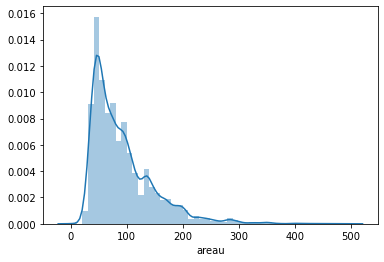

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(df.areau)

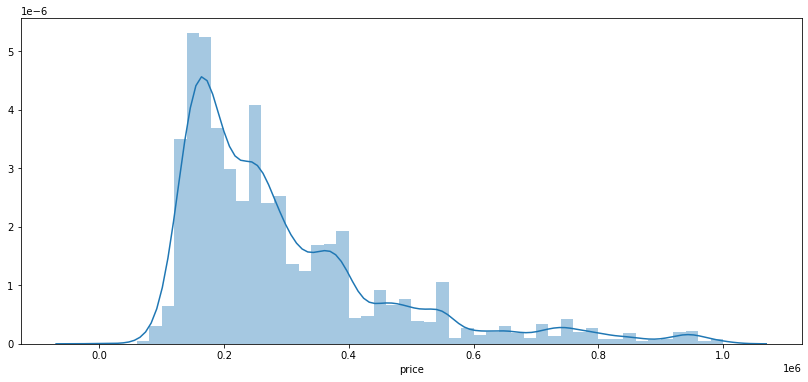

In [26]:
df=df.drop(df.loc[df.price>1000000].index)

f, ax = plt.subplots(figsize=(14, 6))
ax = sns.distplot(df.price)


In [27]:
df.modified_date=df.modified_date.apply(lambda x: x.days+x.seconds/3600/24)

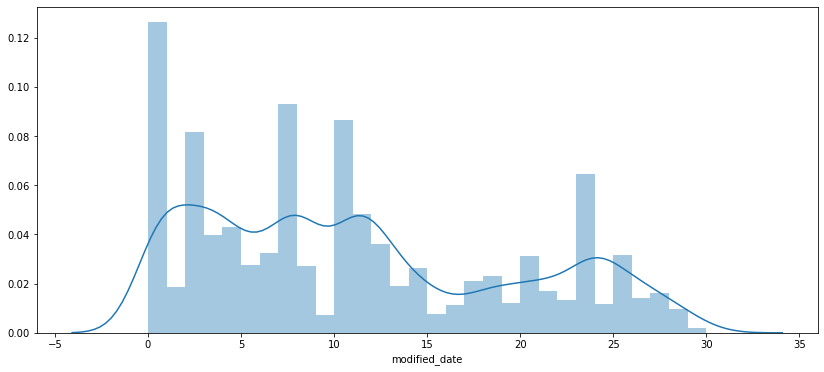

In [28]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.distplot(df.modified_date, bins=30)

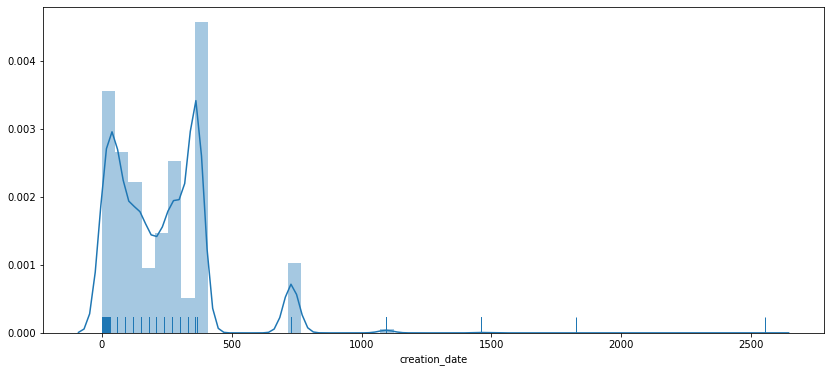

In [29]:
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.distplot(df.creation_date, rug=True)
#ax.set_xscale('log')

In [30]:
pd.set_option('display.max_colwidth',0)

df.loc[df.creation_date>1000]['link']

2703     https://www.imovirtual.com/anuncio/t3-duplex-em-construcao-no-bonfim-com-lugar-de-garagem-IDBGov.html           
3172     https://www.imovirtual.com/anuncio/apartamento-t1-duplex-na-melhor-zona-turistica-da-baixa-do-porto-IDquoE.html 
3175     https://www.imovirtual.com/anuncio/ref2797-t1-t1-rua-prof-antonio-cruz-porto-park-i-IDD7S6.html                 
3896     https://www.imovirtual.com/anuncio/ref2638-t4-duplex-h-s-joao-ipo-IDzvmR.html                                   
3962     https://www.imovirtual.com/anuncio/ref2420-t4-rua-dr-eduardo-santos-silva-paranhos-IDpmRy.html                  
4467     https://www.imovirtual.com/anuncio/t1-duplex-c-terraco-de-20-m2-nos-studios-residence-dragao-IDCBdu.html        
6289     https://www.imovirtual.com/anuncio/apartamento-t0-1-ultimo-andar-baixa-da-cidade-do-porto-IDCOuj.html           
6936     https://www.imovirtual.com/anuncio/porto-contumil-alameda-IDoMBq.html                                           
6938     https://www.imo

In [33]:
df.estado.value_counts()

Em construção     3884
Novo              3523
Usado             1891
Renovado          1010
Para recuperar    57  
Name: estado, dtype: int64

In [34]:
df.from_agency.value_counts()

Anúncio Agência           11168
Consultor                 199  
Anúncio Empreendimento    142  
Promotor                  123  
Gestor                    87   
Anúncio Particular        45   
Name: from_agency, dtype: int64

In [ ]:
df.to_csv('clean.csv') 

In [ ]:
df['district'] = df['address'].str.slice(-14, -7)

In [ ]:
df['district']

In [ ]:
df['district']=df['district'].str.replace('ampanhã','Campanhã')
df['district']=df['district'].str.replace('aranhos','Paranhos')
df['district']=df['district'].str.replace('sarelo','Lordelo do Ouro e Massarelos')
df['district']=df['district'].str.replace('Vitória','Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória')
df['district']=df['district'].str.replace(' Bonfim','Bonfim')

In [ ]:
df['district'].value_counts()

In [ ]:
df.to_csv('clean.csv') 

In [ ]:
df.estado.value_counts()